In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import statsmodels.api as sm
# import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
# from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn import tree

train_data = pd.read_csv("csv/train.csv",  encoding='latin-1')


# Arboles de decision

## árbol de regresión para predecir el precio de las casas usando todas las variables. 

In [24]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

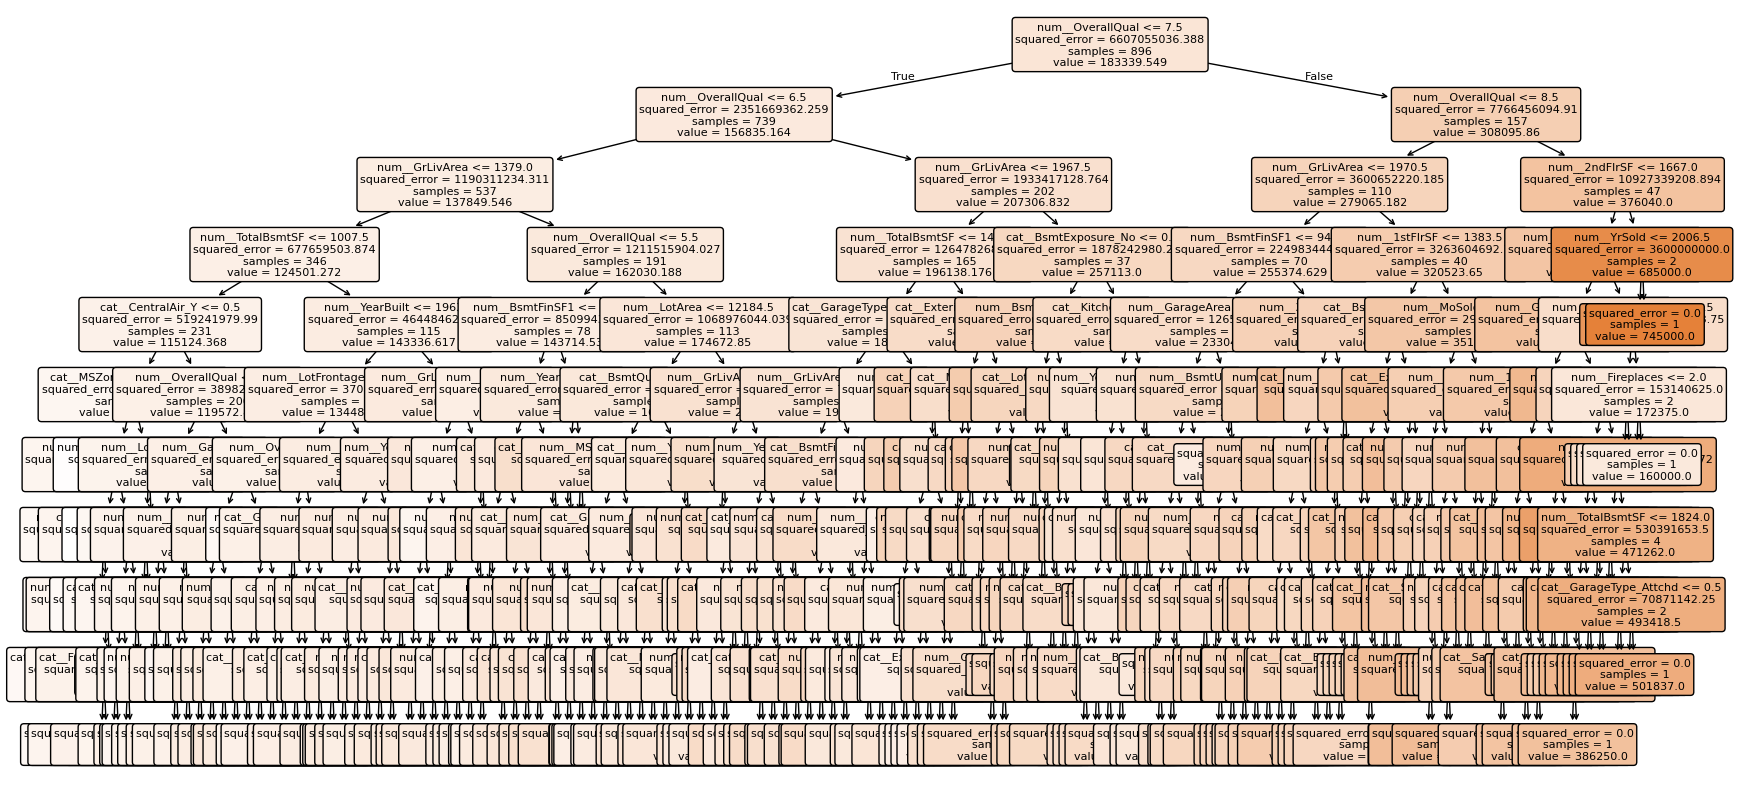

In [27]:
X_full = train_data.drop(columns=["Id", "SalePrice"])
y_full = train_data["SalePrice"] # (objetivo)

# Identificar columnas numéricas y categóricas

num_features = X_full.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_full.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),  # Pasar numéricas sin cambios
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # OneHot para categóricas
    ]
)

# Aplicar la transformación a los datos
X_transformed = preprocessor.fit_transform(X_full)

# Convertir el resultado a un DataFrame
if hasattr(X_transformed, "toarray"): 
    X_transformed = X_transformed.toarray()

X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Eliminar filas con valores nulos
X_transformed_df = X_transformed_df.dropna()
y_filtered = y_full.loc[X_transformed_df.index]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_filtered, test_size=0.2, random_state=42)

# Entrenar el árbol de regresión con todas las variables transformadas
reg_tree_full = DecisionTreeRegressor(max_depth=10, random_state=42)
reg_tree_full.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_full = reg_tree_full.predict(X_test)

# Evaluar el rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred_full)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_full))
r2 = r2_score(y_test, y_pred_full)

# Mostrar métricas de evaluación
mae, rmse, r2

plt.figure(figsize=(20, 10))
tree.plot_tree(reg_tree_full, feature_names=preprocessor.get_feature_names_out(), filled=True, rounded=True, fontsize=8)
plt.show()


# 3 modelos más, cambiando el parámetro de la profundidad del árbol

Text(0.5, 1.0, 'Comparación de R²')

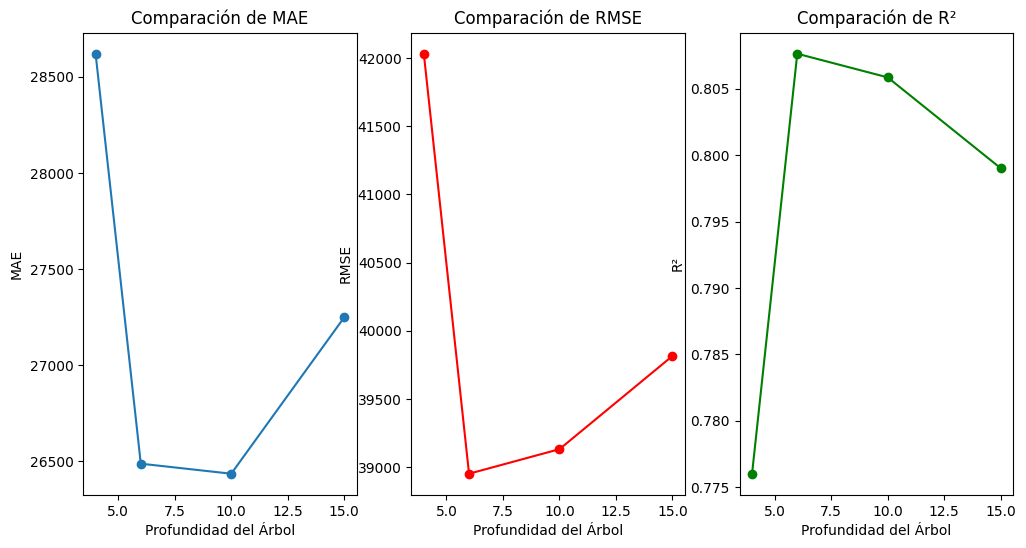

In [ ]:
depths = [4, 6, 10, 15]  # Profundidades a evaluar
results = []

for depth in depths:
    # Entrenar el árbol de regresión con la profundidad actual
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg_tree.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = reg_tree.predict(X_test)

    # Evaluar el modelo
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    results.append({"Depth": depth, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convertir resultados a DataFrame para visualización
results_df = pd.DataFrame(results)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico de MAE
plt.subplot(1, 3, 1)
plt.plot(results_df["Depth"], results_df["MAE"], marker='o', linestyle='-')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("MAE")
plt.title("Comparación de MAE")

# Gráfico de RMSE
plt.subplot(1, 3, 2)
plt.plot(results_df["Depth"], results_df["RMSE"], marker='o', linestyle='-', color='r')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("RMSE")
plt.title("Comparación de RMSE")

# Gráfico de R²
plt.subplot(1, 3, 3)
plt.plot(results_df["Depth"], results_df["R²"], marker='o', linestyle='-', color='g')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("R²")
plt.title("Comparación de R²")
print(results)